**Oppgave**

*Beregn gjennomsnitts- og grenseproduktiviteten til arbeidskraft for produktfunksjon (1), og tegn disse i en figur. Forklar figuren. For hvilken verdi av $N$ er grenseproduktiviteten høyest?  (Hint: husk hvordan vi tegnet sympy uttrykk i matplotlib ved å bruke `sp.lambdify()` i forelesning 5).*

 -> Grenseproduktiviteten til arbeidskraft for produktfunksjon er 249.9590761602292



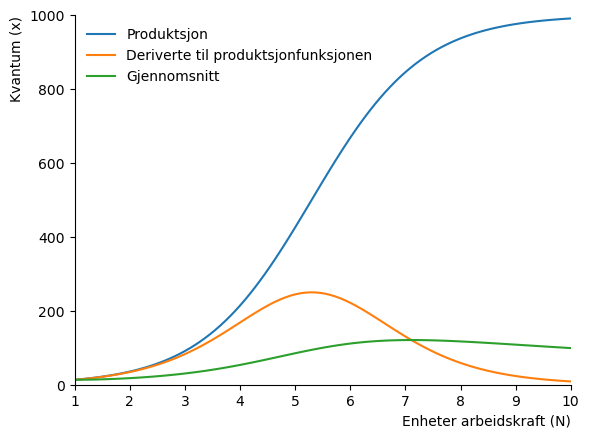

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

N, A, K = sp.symbols('N A K', positive=True, real=True)

def prod(N, A, K):
    return K*(sp.exp(N)/(A+sp.exp(N)))
prod(N, A, K)

def prod_diff(N, A, K):
    return sp.diff(prod(N, A, K), N)
prod_diff(N, A, K)

def mean(N, A, K):
    return prod(N, A, K)/N

prod_lam = sp.lambdify(
    (N, A, K), 
    prod(N, A, K)
)

prod_diff_lam = sp.lambdify(
    (N, A, K), 
    prod_diff(N, A, K)
)

mean_lam = sp.lambdify(
    (N, A, K), 
    mean(N, A, K)
)

n=np.linspace(1,10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(n, prod_lam(n, 200, 1000), label="Produktsjon")
ax.plot(n, prod_diff_lam(n, 200, 1000), label="Deriverte til produktsjonfunksjonen")
ax.plot(n, mean_lam(n, 200, 1000), label="Gjennomsnitt")

ax.legend(loc='best',frameon=False)

print(f"\033[1m -> Grenseproduktiviteten til arbeidskraft for produktfunksjon er {np.max(prod_diff_lam(n, 200, 1000))}\033[0m\n")